In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import nfl_data_py as nfl
import datetime as dt

In [2]:
data_df = nfl.import_pbp_data([2021,2022])
players_df = nfl.import_rosters([2021,2022])
teams_df = nfl.import_team_desc
passing_stat_df = nfl.import_ngs_data('passing')
rushing_stat_df = nfl.import_ngs_data('rushing')
receiving_stat_df = nfl.import_ngs_data('receiving')

2021 done.
2022 done.
Downcasting floats.


In [3]:
data_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,None,None,NaN,None,NaN,43616;43680;52416;49410;53634;43556;53639;4625...,00-0032560;00-0036356;00-0035705;00-0036896;00...,00-0032496;00-0036652;00-0032355;00-0033455;00...,11.0,11.0
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",4.0,52416;42401;49410;43556;38629;40008;47816;4784...,00-0032355;00-0029413;00-0029701;00-0033455;00...,00-0036356;00-0032127;00-0035705;00-0030528;00...,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53600,3947.0,2022_01_TB_DAL,2022091113,DAL,TB,REG,1,DAL,home,TB,...,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"2 DL, 4 LB, 5 DB",4.0,45536;46081;53667;52453;47877;47911;53608;5242...,00-0033662;00-0036663;00-0035261;00-0036646;00...,00-0034773;00-0036411;00-0035699;00-0035681;00...,11.0,11.0
53601,3971.0,2022_01_TB_DAL,2022091113,DAL,TB,REG,1,DAL,home,TB,...,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",4.0,45536;46081;53667;52453;47877;47911;53608;5242...,00-0033662;00-0036663;00-0035261;00-0036646;00...,00-0034773;00-0036411;00-0035699;00-0035681;00...,11.0,11.0
53602,3995.0,2022_01_TB_DAL,2022091113,DAL,TB,REG,1,TB,away,DAL,...,None,"1 RB, 3 TE, 1 WR",7.0,"4 DL, 2 LB, 5 DB",NaN,53504;53441;41667;52421;25511;44904;46088;5351...,00-0030829;00-0036406;00-0019596;00-0031580;00...,00-0036942;00-0036932;00-0033928;00-0034674;00...,11.0,11.0
53603,4016.0,2022_01_TB_DAL,2022091113,DAL,TB,REG,1,TB,away,DAL,...,None,"1 RB, 3 TE, 1 WR",8.0,"4 DL, 2 LB, 5 DB",NaN,53504;53441;41667;52421;25511;44904;46088;5351...,00-0030829;00-0036406;00-0019596;00-0031580;00...,00-0036942;00-0036932;00-0033928;00-0034674;00...,11.0,11.0


In [4]:
list(data_df.columns)

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

In [5]:
passing_stat_df = passing_stat_df[passing_stat_df['season'] > 2020]
rushing_stat_df = rushing_stat_df[rushing_stat_df['season'] > 2020]
receiving_stat_df = receiving_stat_df[receiving_stat_df['season'] > 2020]

In [6]:
passing_stat_df

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
2883,2021,REG,0,Taylor Heinicke,QB,WAS,2.972772,5.153676,7.926965,-2.773289,...,64.979757,65.162940,-0.183183,21.770005,62.034386,00-0031800,Taylor,Heinicke,4,T.Heinicke
2884,2021,REG,0,Josh Allen,QB,BUF,2.901981,6.456064,8.617993,-2.161930,...,63.312693,64.171826,-0.859132,21.667741,64.419873,00-0034857,Joshua,Allen,17,J.Allen
2885,2021,REG,0,Kyler Murray,QB,None,2.773260,5.756847,7.890607,-2.133761,...,69.230769,65.330119,3.900650,21.204686,54.282515,00-0035228,Kyler,Murray,1,K.Murray
2886,2021,REG,0,Justin Fields,QB,CHI,2.912216,7.110189,9.519042,-2.408853,...,58.888889,61.867893,-2.979004,22.297169,63.829298,00-0036945,Justin,Fields,1,J.Fields
2887,2021,REG,0,Teddy Bridgewater,QB,DEN,2.914507,5.646912,8.067210,-2.420298,...,66.901408,64.885828,2.015581,20.746068,56.542885,00-0031237,Theodore,Bridgewater,5,T.Bridgewater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,2022,REG,1,Russell Wilson,QB,DEN,3.036286,3.657241,7.274146,-3.616905,...,69.047619,66.513654,2.533965,20.848561,43.613312,00-0029263,Russell,Wilson,3,R.Wilson
3551,2022,REG,1,Davis Mills,QB,HOU,2.555189,6.519565,6.917500,-0.397935,...,62.162162,69.672828,-7.510666,21.092713,46.094460,00-0036898,Davis,Mills,10,D.Mills
3552,2022,REG,1,Jared Goff,QB,DET,2.468595,4.522381,8.170541,-3.648160,...,56.756757,67.376827,-10.620070,22.031008,53.922861,00-0033106,Jared,Goff,16,J.Goff
3553,2022,REG,1,Mac Jones,QB,NE,2.511793,5.252000,8.832069,-3.580069,...,68.965517,69.627464,-0.661946,22.772570,52.200357,00-0036972,Michael,Jones,10,M.Jones


In [7]:
rushing_stat_df

,season,season_type,week,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,...,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
2951,2021,REG,0,Najee Harris,RB,None,3.968867,14.657980,2.766662,307,...,-48.479755,3.908795,-0.161062,0.342193,7,00-0036893,Najee,Harris,22,N.Harris
2952,2021,REG,0,Mike Davis,RB,ATL,4.535368,26.811594,2.841512,138,...,-104.802134,3.644928,-0.764979,0.262774,3,00-0032063,Michael,Davis,28,M.Davis
2953,2021,REG,0,Aaron Jones,RB,GB,3.797960,14.035088,2.702788,171,...,47.063880,4.672515,0.276846,0.352941,4,00-0033293,Aaron,Jones,33,A.Jones
2954,2021,REG,0,Javonte Williams,RB,DEN,4.212171,20.689655,2.986632,203,...,69.569618,4.448276,0.346118,0.388060,4,00-0036997,Javonte,Williams,33,J.Williams
2955,2021,REG,0,Devontae Booker,RB,NYG,3.422715,16.551724,2.619777,145,...,-31.635987,4.089655,-0.221231,0.377622,2,00-0032972,Devontae,Booker,28,D.Booker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,2022,REG,1,Jamaal Williams,RB,DET,4.686429,36.363636,2.664600,11,...,-11.823533,2.545455,-1.074867,0.363636,2,00-0033948,Jamaal,Williams,30,Ja.Williams
3627,2022,REG,1,Cordarrelle Patterson,RB,ATL,3.188333,13.636364,2.646762,22,...,8.984910,5.454545,0.408405,0.454545,1,00-0030578,Cordarrelle,Patterson,84,C.Patterson
3628,2022,REG,1,Nick Chubb,RB,CLE,3.379787,22.727273,3.221143,22,...,51.527966,6.409091,2.342180,0.545455,0,00-0034791,Nicholas,Chubb,24,N.Chubb
3629,2022,REG,1,Isiah Pacheco,RB,KC,3.331774,66.666667,2.792900,12,...,22.437136,5.166667,1.869761,0.416667,1,00-0037197,Isiah,Pacheco,10,I.Pacheco


In [8]:
receiving_stat_df

,season,season_type,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,...,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
7377,2021,REG,0,Rondale Moore,WR,ARI,7.988393,5.663637,1.111875,1.684539,...,435.0,1,8.371296,6.849622,1.521675,00-0036936,Rondale,Moore,4,R.Moore
7378,2021,REG,0,Devin Duvernay,WR,None,7.904750,3.730289,6.885106,6.165383,...,272.0,2,4.540000,4.713767,-0.173767,00-0036331,Devin,Duvernay,13,D.Duvernay
7379,2021,REG,0,Sterling Shepard,WR,NYG,7.694694,2.598858,7.991321,10.176822,...,366.0,1,3.259722,3.515494,-0.255772,00-0032385,Sterling,Shepard,3,S.Shepard
7380,2021,REG,0,Marquise Brown,WR,BAL,7.661544,3.534506,11.478082,31.928149,...,1008.0,6,4.337033,4.553453,-0.216420,00-0035662,Marquise,Brown,5,M.Brown
7381,2021,REG,0,Deonte Harris,WR,NO,7.182593,3.632328,10.362203,16.188585,...,570.0,3,6.886389,5.560030,1.326359,00-0035215,Deonte,Harris,11,D.Harris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,2022,REG,1,Hunter Renfrow,WR,LV,4.143333,1.713962,5.865000,10.210951,...,21.0,0,1.346667,2.590313,-1.243646,00-0034983,Hunter,Renfrow,13,H.Renfrow
9092,2022,REG,1,Jakobi Meyers,WR,NE,4.076667,1.403292,15.358333,35.977824,...,55.0,0,0.487500,0.914341,-0.426841,00-0034960,Jakobi,Meyers,16,J.Meyers
9093,2022,REG,1,Mike Evans,WR,TB,4.030000,1.670553,12.107143,29.305993,...,71.0,1,2.534000,1.814879,0.719121,00-0031408,Mike,Evans,13,M.Evans
9094,2022,REG,1,Hayden Hurst,TE,CIN,3.641250,4.475872,5.476250,10.871237,...,46.0,0,4.334000,4.192911,0.141089,00-0034830,Hayden,Hurst,88,H.Hurst


In [9]:
epa_df = pd.DataFrame({
    'offense_epa': data_df.groupby('posteam')['epa'].sum(),
    'offense_plays': data_df['posteam'].value_counts(),
    'offense_yards': data_df.groupby('posteam')['yards_gained'].sum(), 
})

epa_df['offense_epa/play'] = epa_df['offense_epa'] / epa_df['offense_plays']

epa_df.sort_values(by='offense_epa/play', ascending=False).head(10)

,offense_epa,offense_plays,offense_yards,offense_epa/play
KC,235.735138,1792,8643.0,0.131549
BUF,142.833176,1665,7818.0,0.085786
GB,94.805420,1522,6818.0,0.062290
TB,99.847809,1713,7958.0,0.058288
PHI,59.066170,1560,6925.0,0.037863
LAC,57.904812,1540,7003.0,0.037601
IND,52.184040,1490,6422.0,0.035023
NE,50.977997,1515,6590.0,0.033649
DAL,41.114273,1690,7482.0,0.024328
LA,40.421265,1782,8084.0,0.022683


In [10]:
epa_df['defense_epa'] = data_df.groupby('defteam')['epa'].sum()
epa_df['defense_plays'] = data_df['defteam'].value_counts()
epa_df['defense_epa/play'] = epa_df['defense_epa'] / epa_df['defense_plays']
epa_df['defense_yards_given_up'] = data_df.groupby('defteam')['yards_gained'].sum()

epa_df.sort_values(by='defense_epa/play', ascending=False).head()


,offense_epa,offense_plays,offense_yards,offense_epa/play,defense_epa,defense_plays,defense_epa/play,defense_yards_given_up
NYJ,-119.205620,1455,5594.0,-0.081928,139.188324,1538,0.090500,7038.0
JAX,-122.477348,1446,5578.0,-0.084701,125.221268,1467,0.085359,6396.0
DET,-77.848480,1479,5880.0,-0.052636,97.553131,1485,0.065692,6915.0
ATL,-103.788979,1429,5582.0,-0.072630,68.892036,1496,0.046051,6593.0
WAS,-48.964497,1485,5898.0,-0.032973,63.508785,1453,0.043709,6493.0


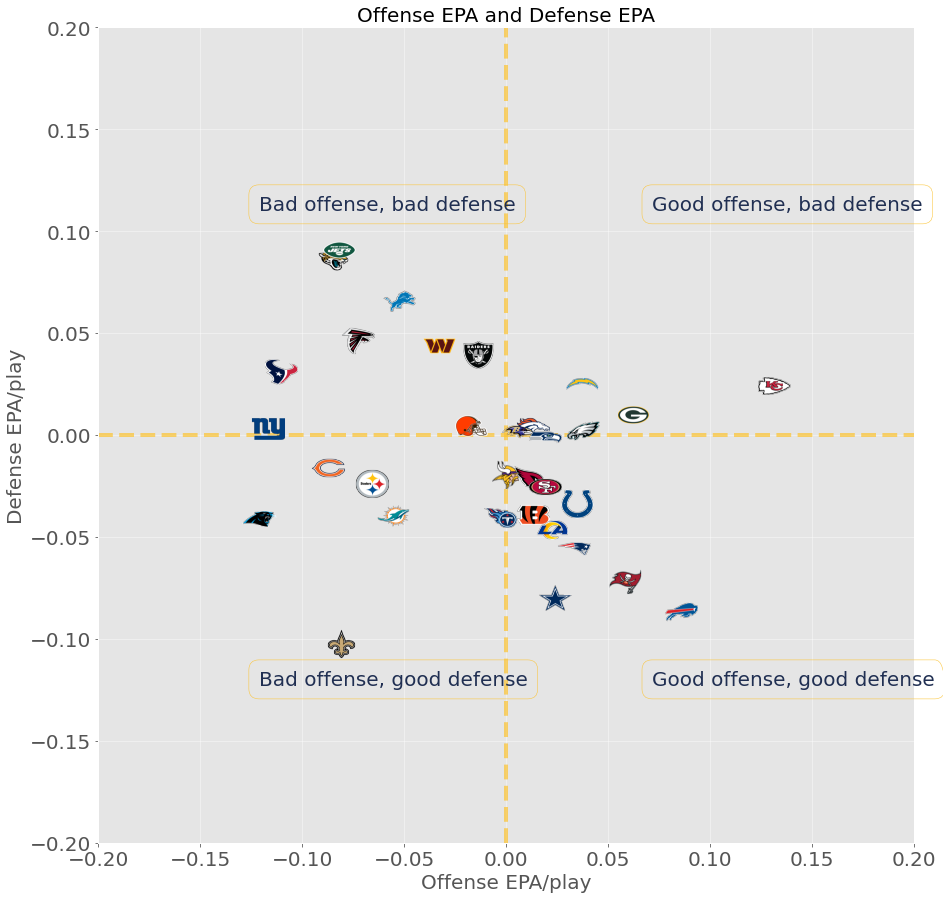

In [11]:
import requests
from io import BytesIO

plt.style.use('ggplot')

x = epa_df['offense_epa/play'].values
y = epa_df['defense_epa/play'].values

fig, ax = plt.subplots(figsize=(15, 15))

ax.grid(alpha=0.5)
# plot a vertical and horixontal line to create separate quadrants
ax.vlines(0, -0.2, 0.2, color='#fcc331', alpha=0.7, lw=4, linestyles='dashed')
ax.hlines(0, -0.2, 0.2, color='#fcc331', alpha=0.7, lw=4, linestyles='dashed')
ax.set_ylim(-0.2, 0.2)
ax.set_xlim(-0.2, 0.2)
ax.set_xlabel('Offense EPA/play', fontsize=20)
ax.set_ylabel('Defense EPA/play', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

annot_styles = {
    'bbox': {'boxstyle': 'round,pad=0.5', 'facecolor': 'none', 'edgecolor':'#fcc331'},
    'fontsize': 20,
    'color': '#202f52'
}

# annotate the quadrants
ax.annotate('Good offense, good defense', xy=(x.max() - 0.06, y.min() - 0.02), **annot_styles)
ax.annotate('Bad offense, good defense', xy=(x.min(), y.min() - 0.02), **annot_styles)
ax.annotate('Good offense, bad defense', xy=(x.max() - 0.06, y.max() + 0.02), **annot_styles)
ax.annotate('Bad offense, bad defense', xy=(x.min(), y.max() + 0.02), **annot_styles)

team_colors = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/teams_colors_logos.csv')

# annotate the points with team logos
for idx, row in epa_df.iterrows():
    offense_epa = row['offense_epa/play']
    defense_epa = row['defense_epa/play']
    logo_src = team_colors[team_colors['team_abbr'] == idx]['team_logo_espn'].values[0]
    res = requests.get(logo_src)
    img = plt.imread(BytesIO(res.content))
    ax.imshow(img, extent=[row['offense_epa/play']-0.0085, row['offense_epa/play']+0.0085, row['defense_epa/play']-0.00725, row['defense_epa/play']+0.00725], aspect='equal', zorder=1000)

ax.set_title('Offense EPA and Defense EPA', fontsize=20);